In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
df=pd.read_csv('1_boston_housing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
MEDV       0
dtype: int64

In [6]:
X=df.loc[:,df.columns!='MEDV']
y=df.loc[:,df.columns=='MEDV']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=124)

In [7]:
mms=MinMaxScaler()
mms.fit(X_train)
X_train=mms.transform(X_train)
X_test=mms.transform(X_test)

In [10]:
Model=Sequential()

Model.add(Dense(128,name='Dense1',activation='relu',input_shape=(13,)))
Model.add(Dense(64,name='Dense2',activation='relu'))
Model.add(Dense(1,name='Dense_output',activation='linear'))
          
Model.compile(optimizer='adam',loss='mse',metrics=['mae'])
Model.summary()          

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense1 (Dense)              (None, 128)               1792      
                                                                 
 Dense2 (Dense)              (None, 64)                8256      
                                                                 
 Dense_output (Dense)        (None, 1)                 65        
                                                                 
Total params: 10113 (39.50 KB)
Trainable params: 10113 (39.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
history=Model.fit(X_train,y_train,validation_split=0.05,verbose=1,epochs=100)

Epoch 1/100
11/11 [==============================] - 1s 28ms/step - loss: 570.8120 - mae: 22.2174 - val_loss: 400.4994 - val_mae: 18.7019
Epoch 2/100
11/11 [==============================] - 0s 6ms/step - loss: 537.4970 - mae: 21.4224 - val_loss: 368.4331 - val_mae: 17.7844
Epoch 3/100
11/11 [==============================] - 0s 6ms/step - loss: 491.8730 - mae: 20.3048 - val_loss: 318.6576 - val_mae: 16.2542
Epoch 4/100
11/11 [==============================] - 0s 7ms/step - loss: 420.2385 - mae: 18.3882 - val_loss: 245.6051 - val_mae: 13.9950
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 321.3101 - mae: 15.3541 - val_loss: 157.7741 - val_mae: 10.7146
Epoch 6/100
11/11 [==============================] - 0s 6ms/step - loss: 209.9542 - mae: 11.6916 - val_loss: 93.4173 - val_mae: 7.7117
Epoch 7/100
11/11 [==============================] - 0s 6ms/step - loss: 139.6546 - mae: 9.2670 - val_loss: 89.1039 - val_mae: 7.6364
Epoch 8/100
11/11 [==========================

11/11 [==============================] - 0s 8ms/step - loss: 18.6474 - mae: 2.8822 - val_loss: 14.0754 - val_mae: 2.4179
Epoch 63/100
11/11 [==============================] - 0s 8ms/step - loss: 18.4996 - mae: 2.8397 - val_loss: 13.3629 - val_mae: 2.2874
Epoch 64/100
11/11 [==============================] - 0s 7ms/step - loss: 18.4622 - mae: 2.8291 - val_loss: 13.9139 - val_mae: 2.4110
Epoch 65/100
11/11 [==============================] - 0s 6ms/step - loss: 18.3318 - mae: 2.8336 - val_loss: 13.5282 - val_mae: 2.3445
Epoch 66/100
11/11 [==============================] - 0s 6ms/step - loss: 18.3661 - mae: 2.8253 - val_loss: 13.7903 - val_mae: 2.4057
Epoch 67/100
11/11 [==============================] - 0s 6ms/step - loss: 18.3518 - mae: 2.7865 - val_loss: 12.7747 - val_mae: 2.2129
Epoch 68/100
11/11 [==============================] - 0s 5ms/step - loss: 18.1649 - mae: 2.8123 - val_loss: 14.8528 - val_mae: 2.6235
Epoch 69/100
11/11 [==============================] - 0s 7ms/step - loss: 1

In [13]:
mse_nn,mae_nn=Model.evaluate(X_test,y_test)
print('Mean square error: ',mse_nn)
print('Mean absoulte error: ',mae_nn)

5/5 [==============================] - 0s 3ms/step - loss: 18.2985 - mae: 3.1205
Mean square error:  18.298452377319336
Mean absoulte error:  3.12054705619812


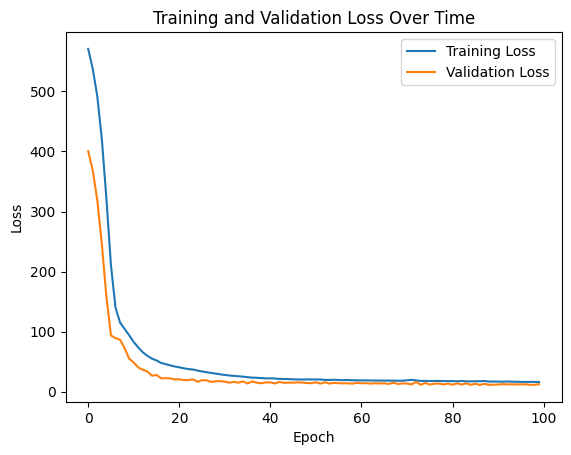

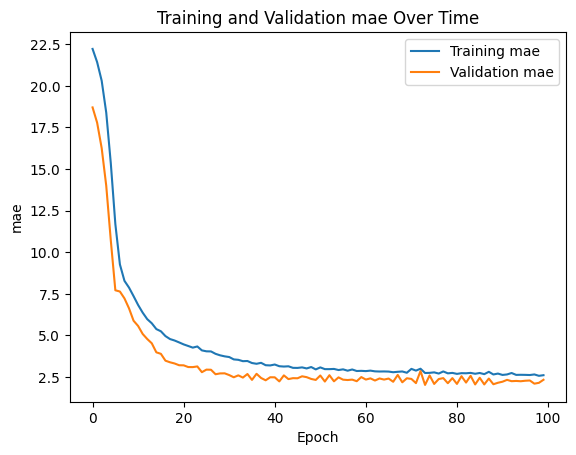

In [14]:
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Over Time')
    plt.legend()
    plt.show()

def plot_metric(history, metric):
    plt.plot(history.history[metric], label='Training ' + metric)
    plt.plot(history.history['val_' + metric], label='Validation ' + metric)
    plt.xlabel('Epoch')
    plt.ylabel(metric)
    plt.title('Training and Validation ' + metric + ' Over Time')
    plt.legend()
    plt.show()

# Assuming you have trained your model and stored the history object
# history = model.fit(X_train, y_train, validation_split=0.05, epochs=epochs, verbose=verbose)

# Plotting loss over epochs
plot_loss(history)

# Plotting other metrics like Mean Absolute Error (mae)
plot_metric(history, 'mae')
